In [25]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version = 1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [26]:
# Datasets loaded by Scikit-Learn generally have a similar dictionary
# structure, including the following:
# A DESCR key describing the dataset

# A data key containing an array with one row per instance and one
# column per feature

# A target key containing an array with the labels

In [27]:
X, y = mnist["data"], mnist["target"]
print(X.shape)
y.shape

(70000, 784)


(70000,)

In [28]:
#There are 70,000 images, and each image has 784 features.
# This is because each image is 28 × 28 pixels, and each feature simply represents one
# pixel’s intensity, from 0 (white) to 255 (black). Let’s take a peek at one
# digit from the dataset. All you need to do is grab an instance’s feature
# vector, reshape it to a 28 × 28 array, and display it using Matplotlib’s
# imshow() function:

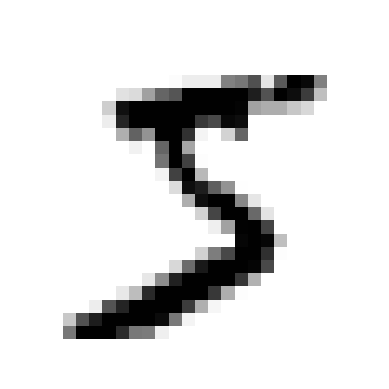

In [29]:
import matplotlib as mpl
import matplotlib.pyplot as plt
temp = X.to_numpy()
some_digit = temp[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [30]:
y[0] ## Indeed its a 5

'5'

## PREPARING DATASET

In [32]:
# The MNIST dataset is actually already split
# into a training set (the first 60,000 images) and a test set (the last 10,000
# images):
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]